In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from scipy.stats import uniform
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RepeatedKFold

In [2]:
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)

In [3]:
cycles = 20

rs = np.arange(cycles)
scoring = ['accuracy']
scores = []
for i in range(cycles):
    Kfold_train = KFold(n_splits=10, random_state=rs[i], shuffle=True)
    score1 = cross_validate(logistic, iris.data, iris.target, cv=Kfold_train, scoring=scoring)
    scores.append([np.mean(score1['test_accuracy']), np.std(score1['test_accuracy'])])

df_Scores1 = pd.DataFrame(scores)
df_Scores1[0].mean()

0.9740000000000002

<function matplotlib.pyplot.show(close=None, block=None)>

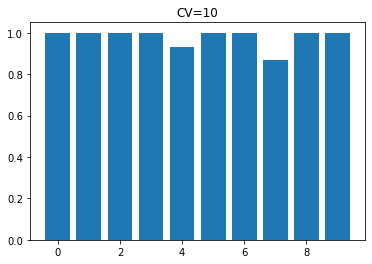

In [4]:
plt.bar(np.arange(len(score1['test_accuracy'])),score1['test_accuracy'])
plt.title('CV=10')
plt.show

In [5]:
scores = []
for i in range(cycles):
    Kfold_train = KFold(n_splits=3, random_state=rs[i], shuffle=True)
    score2 = cross_validate(logistic, iris.data, iris.target, cv=Kfold_train, scoring=scoring)
    scores.append([np.mean(score2['test_accuracy']), np.std(score2['test_accuracy'])])

df_Scores2 = pd.DataFrame(scores)
df_Scores2[0].mean()

0.9699999999999998

<function matplotlib.pyplot.show(close=None, block=None)>

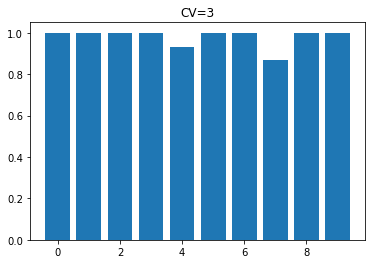

In [6]:
plt.bar(np.arange(len(score1['test_accuracy'])),score1['test_accuracy'])
plt.title('CV=3')
plt.show

In [7]:
# When the n_splits=10, the size of the testing group gets quite small
for train_index, test_index in Kfold_train.split(iris.data, iris.target):
    print(len(test_index))

50
50
50


In [8]:
scores = []
for i in range(cycles):
    Kfold_train = RepeatedKFold(n_splits=2, n_repeats=5, random_state=rs[i])
    score3 = cross_validate(logistic, iris.data, iris.target, cv=Kfold_train, scoring=scoring)
    scores.append([np.mean(score3['test_accuracy']), np.std(score3['test_accuracy'])])

df_Scores3 = pd.DataFrame(scores)
df_Scores3[0].mean()

0.9664666666666666

<function matplotlib.pyplot.show(close=None, block=None)>

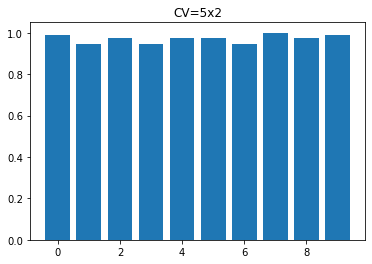

In [9]:
plt.bar(np.arange(len(score3['test_accuracy'])),score3['test_accuracy'])
plt.title('CV=5x2')
plt.show

In [10]:
for train_index, test_index in Kfold_train.split(iris.data, iris.target):
    print(len(test_index))

75
75
75
75
75
75
75
75
75
75


In [11]:
# ten cycles of: 10xcv, 3xcv, 5x2cv
df_Scores1[0].mean(), df_Scores2[0].mean(), df_Scores3[0].mean()

(0.9740000000000002, 0.9699999999999998, 0.9664666666666666)

## Let's do some statistical testing

In [12]:
# perform Kruskal-Wallis Test 
# Here, we can reject nul hypothesis
stats.kruskal(df_Scores1[0],
              df_Scores2[0],
              df_Scores3[0],
             )

KruskalResult(statistic=19.4880416503167, pvalue=5.864426183020513e-05)

In [13]:
# Here, we can reject nul hypothesis
stats.wilcoxon(df_Scores1[0], df_Scores2[0],)

WilcoxonResult(statistic=30.0, pvalue=0.00365447998046875)

In [14]:
# Here, we can reject nul hypothesis
stats.wilcoxon(df_Scores1[0], df_Scores3[0])

/home/clarovak/.conda/envs/trf/lib/python3.6/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=2.0, pvalue=0.00018053913916068703)

In [15]:
stats.wilcoxon(df_Scores2[0], df_Scores3[0])

WilcoxonResult(statistic=45.0, pvalue=0.023950576782226562)

In [16]:
# Here, we can reject nul hypothesis
stats.mannwhitneyu(df_Scores1[0], df_Scores2[0])

MannwhitneyuResult(statistic=85.0, pvalue=0.0008510342075580786)

In [17]:
# Here, we can reject nul hypothesis
stats.mannwhitneyu(df_Scores1[0], df_Scores3[0])

MannwhitneyuResult(statistic=55.5, pvalue=4.246905261974496e-05)

In [18]:
stats.mannwhitneyu(df_Scores2[0], df_Scores3[0])

MannwhitneyuResult(statistic=123.0, pvalue=0.018659179464147)